<a href="https://colab.research.google.com/github/wbjeon2k/pytorchbookExcercise/blob/master/AIHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# libraries _ should not change
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris # iris_dataset
import matplotlib.pyplot as plt # plot function

# iris dataset _ should not change
iris = load_iris() 
dataset = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names']+['target'])
total_data = dataset.iloc[:, 2:5].values # list of [petal length, petal width, iris name] -> [x_1, x_2, y]
# y distribution = (0: Setosa, 1: Versicolor, 2: Virginica)
from logging import exception
#print(total_data)

In [2]:

# write the code of model (Logistic regression)
# your output should be list of the linear equation's theta vector 
# 1_theta is classifying whether Setosa or not.
# 2_theta is classifying whether Virginica or not.

#static random seed as 0,
#reduce metric randomness
np.random.seed(0)

learning_rate = 1e-3
thetas = np.zeros((2,2),dtype=float)
#thetas = np.random.rand(2,2)

#custom sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#if h(x) >= 0.5, round up as 1
#p > 0.5 --> regard as true.
def y_hat_round(x):
    #if (x>= 0.4):
    if (x>= 0.5):
        return 1.0
    else:
        return 0.0

#if the label == 2, it is Virginica.
#return y = 1
def is_virginica(x):
    t = x.astype(int)
    if (t == 2):
        return 1.0
    else:
        return 0.0

#gets a loss per a data point.
#sum of all x[i] is the total loss.
#Loss(y^hat , y)
def logistic_loss_function(y_hat, y):
    #print(y_hat, y)
    assert(y_hat >= 0.0 and y_hat <= 1.0)
    if (y == 1.0):
        return -np.log(y_hat)
    elif (y == 0.0):
        return -np.log(1 - y_hat)
    else:
        assert(y==1 or y==0)


#number of learning iteration for gradient descent
iterate = 1000

#train theta_2, virginica or not.
#does not split into test/train set. use all 150 data points
for train in range(iterate):
    #print(f'{train}th learning')
    #print(f'start with parameters \n {thetas},\n learning rate {learning_rate}')

    #set gradient, loss as 0
    grads = np.zeros((2,2))
    loss = np.zeros(2)
    
    for i in range(150):
        #ith data
        x_i = total_data[i][0:2]
        #ith label
        label_i = total_data[i][2]

        #z = theta[1]*x
        y_vir_z = thetas[1][0]*x_i[0] + thetas[1][1]*x_i[1]
        #equivalent to y_hat = sigmoid(z)
        y_vir = sigmoid(y_vir_z)

        #gradient calculation phase.
        #(h(x[i]) - y)*x[i][j]
        #if label is virginica, answer y == 1
        #else, answer y == 0
        grads[1][0] += (y_vir - is_virginica(label_i)) * x_i[0]
        grads[1][1] += (y_vir - is_virginica(label_i)) * x_i[1]

        loss[1] += logistic_loss_function(y_vir, is_virginica(label_i))

    if(train % 100 == 0):
        #print(f'{train}th iteration, Loss: {loss[1]}')
    #gradient descent
    thetas[1][0] -= learning_rate * grads[1][0]
    thetas[1][1] -= learning_rate * grads[1][1]

print(f'thetas[1]: {thetas[1]}')


0th iteration, Loss: 103.97207708399195
100th iteration, Loss: 92.09059860392728
200th iteration, Loss: 84.32788870254049
300th iteration, Loss: 79.08198560222698
400th iteration, Loss: 75.40324332367213
500th iteration, Loss: 72.73525315052333
600th iteration, Loss: 70.74399703698816
700th iteration, Loss: 69.22173752643388
800th iteration, Loss: 68.03448316112883
900th iteration, Loss: 67.09283515033924
thetas[1]: [-1.76749856  5.28923681]


In [3]:
#if the label == 1, it is versicolor.
#else, it is not versicolor.
def is_versi(x):
    t = x.astype(int)
    if (t == 1):
        return 1.0
    else:
        return 0.0

#if the label == 0, it is Setosa.
#else, it is not Setosa.
def is_setosa(x):
    t = x.astype(int)
    if (t > 0):
        return 0.0
    else:
        return 1.0

#gets the h(x) for Virginica
def y_vir_raw(x):
    return sigmoid(thetas[1][0]*x[0] + thetas[1][1]*x[1])

#train theta_1, setosa or not.
#does not split into test/train set. use all 150 data points
thetas[0] = [0.0, 0.0]
learning_rate = 1e-3
#print(thetas[0])
for train in range(iterate):

    #set gradient, loss as 0
    grads = np.zeros((2,2))
    loss = np.zeros(2)
    
    for i in range(150):
        #ith data
        x_i = total_data[i][0:2]
        #ith label
        label_i = total_data[i][2]

        #z = theta[0]*x
        y_setosa_z = thetas[0][0]*(x_i[0]) + thetas[0][1]*x_i[1]
        #equivalent to y_hat = sigmoid(z)
        y_setosa = sigmoid(y_setosa_z)

        y = 0.0
        #if the true label is setosa, answer y is 1.
        if (is_setosa(label_i) == 1.0):
            y = 1.0
        #if the true label is virginica,
        #and prediction value for Setosa is smaller than Virginica,
        #which means that Virginica is not classified as Setosa
        #answer y is 1.
        elif (is_virginica(label_i) and (y_setosa < y_vir_raw(x_i)) ):
            y = 1.0
        #in other cases, answer y is 0
        else:
            y = 0.0
        
        grads[0][0] += (y_setosa - y) * x_i[0]
        grads[0][1] += (y_setosa - y) * x_i[1]

        loss[0] += logistic_loss_function(y_setosa, y)

    if(train % 100 == 0):
        #print(f'{train}th iteration, Loss: {loss[0]}')
    #gradient descent
    thetas[0][0] -= learning_rate * (grads[0][0])
    thetas[0][1] -= learning_rate * (grads[0][1])

print(f'thetas[0]: {thetas[0]}')

0th iteration, Loss: 103.97207708399195
100th iteration, Loss: 102.88374681393846
200th iteration, Loss: 102.57341085339789
300th iteration, Loss: 102.24870680011564
400th iteration, Loss: 102.03986658409809
500th iteration, Loss: 101.90529119397081
600th iteration, Loss: 102.22596413318796
700th iteration, Loss: 102.1789571894553
800th iteration, Loss: 102.14955249827267
900th iteration, Loss: 101.6852331384382
thetas[0]: [-0.42467199  1.19754823]


In [4]:
print(f'final parameter thetas:\n {thetas}')

final parameter thetas:
 [[-0.42467199  1.19754823]
 [-1.76749856  5.28923681]]


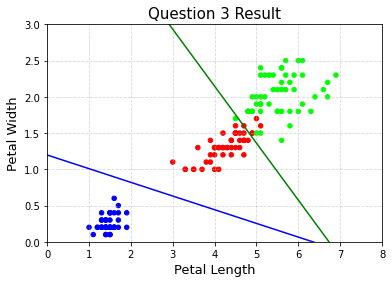

<Figure size 432x288 with 0 Axes>

In [5]:
# plot function _ should not change
line_x = [i for i in np.arange(0.0, 9.0, 0.9)]
line1_y = [((thetas[0][0] * i) + thetas[0][1]) for i in np.arange(0.0, 4.0, 0.4)]
line2_y = [((thetas[1][0] * i) + thetas[1][1]) for i in np.arange(0.0, 4.0, 0.4)]
plt.title("Question 3 Result", fontsize=15)
plt.scatter(total_data[:, 0], total_data[:, 1], c=total_data[:, 2], cmap='brg', s=20)
plt.plot(line_x, line1_y, 'b-', line_x, line2_y, 'g-')
#plt.plot(line_x, line1_y, 'b-', linewidth = 10)

plt.xlabel("Petal Length", fontsize=13)
plt.ylabel("Petal Width", fontsize=13)
plt.xlim(0, 8)
plt.ylim(0, 3)
plt.grid(alpha=0.5, linestyle='--')
plt.show()
plt.savefig('aia1_q3.png') 

# ** **From below is not the content of this Q2.** **  
Below is for my custom tests and failed approaches.

In [ ]:
#linear regression setosa, for comparison

#change the label of non-setosa as 1.
#this is only for classifying setosa.
data_setosa = total_data[0:100]
for i in range(100):
    if (data_setosa[i][2] != 0):
        data_setosa[i][2] = 1
#print(data_setosa)

#get features
x = data_setosa[:,0:2]
#get label
y = data_setosa[:,2]

xT = np.transpose(x)
xTx = np.matmul(xT, x)
xTx_inverse = np.linalg.inv(xTx)
#compute analytical model (xTx)^(-1)*xT*y
theta_star = np.linalg.multi_dot([xTx_inverse,xT,y])
print(theta_star)

[-0.08560379  0.98874982]


In [ ]:
#gradient calculation phase.s
        #(h(x[i]) - y)*x[i][j]
        #if label is setosa, answer y == 1
        #else, answer y == 0
        y = 0.0
        #if (y_vir == 0.0 and is_setosa(l_i) == 1.0):
        #    y = 1.0
        if (is_setosa(l_i) == 1.0):
            y = 1.0
        #elif (y_vir == 1.0 and is_virginica(l_i) == 1.0 and y_hat_round(y_setosa) == 0.0):
        #    y = 1.0
        elif (is_virginica(l_i) and (y_setosa < y_vir_raw(a_i)) ):
            y = 1.0
        else:
            y = 0.0



```python
#below are miscellaneous codes
#this is not part of the HW.

#precision check

#check setosa or not
cnt = 0
for i in range(150):
    x_i = total_data[i][0:2]
    y_label = total_data[i][2]

    #get prediction value
    y_setosa_z = thetas[0][0]*x_i[0] + thetas[0][1]*x_i[1]
    y_hat = sigmoid(y_setosa_z)
    #round up prediction. p >= 0.5 --> 1/ p < 0.5 --> 0
    y_prediction = y_hat_round(y_hat)

    #two correct predictions:
    #1. classify setosa as setosa(predicton > 0.5)
    #2. classify non-setosa as non-setosa(prediction < 0.5)
    if(y_prediction == 1.0 and y_label == 0):
        cnt += 1
    elif(y_prediction == 0.0 and y_label != 0):
        cnt += 1
print("Setosa accuracy")
print(cnt/150)

cnt = 0
#same method as above.
#for virginica
for i in range(150):
    x_i = total_data[i][0:2]
    y_label = total_data[i][2]

    y_vir_z = thetas[1][0]*x_i[0] + thetas[1][1]*x_i[1]
    y_hat = sigmoid(y_vir_z)

    y_prediction = y_hat_round(y_hat)
    #print(f'y_label {y_label}, y_hat {y_hat}')
    if(y_prediction == 1.0 and y_label == 2):
        cnt += 1
    elif(y_prediction == 0.0 and y_label != 2):
        cnt += 1

print("virginica accuracy")
print(cnt/150)

#gradient descent fails at classifying setosa.
for i in idx:
    #for i in range(100):
        x_i = total_data[i][0:2]

        label_i = total_data[i][2]


        y_setosa_z = thetas[0][0]*x_i[0] + thetas[0][1]*x_i[1]
        y_setosa = sigmoid(y_setosa_z)

        grads[0][0] += (y_setosa - is_setosa(label_i)) * x_i[0]
        grads[0][1] += (y_setosa - is_setosa(label_i)) * x_i[1]

        loss[0] += logistic_loss_function(y_setosa, is_setosa(label_i))

    thetas[0][0] -= learning_rate * grads[0][0]
    thetas[0][1] -= learning_rate * grads[0][1]

#data preprocess
#normalization, standardization
petal_len = total_data[:,[0]]
len_std = np.std(petal_len)
len_mean = np.mean(petal_len)
#print(petal_len)

petal_width = total_data[:,[1]]
width_std = np.std(petal_width)
width_mean = np.mean(petal_width)

normalized_data = np.zeros((150,3))
for i in range(150):
    normalized_data[i][0] = (total_data[i][0] - len_mean) / len_std
    normalized_data[i][1] = (total_data[i][1] - width_mean) / width_std
    normalized_data[i][2] = total_data[i][2]


#linear regression
#train theta_1, setosa or not
#apply analytical method
data_setosa = total_data.copy()

#change the label of non-setosa as 1.
#this is only for classifying setosa.
for i in range(100):
    if (data_setosa[i][2] != 0):
        data_setosa[i][2] = 1
#print(data_setosa)

#get features
x = data_setosa[:,0:2]
#get label
y = data_setosa[:,2]

xT = np.transpose(x)
xTx = np.matmul(xT, x)
xTx_inverse = np.linalg.inv(xTx)
#compute analytical model (xTx)^(-1)*xT*y
theta_star = np.linalg.multi_dot([xTx_inverse,xT,y])
print(theta_star)

thetas[0] = theta_star
#[[ 1.01661462 -4.94138402]
#[-1.76749856  5.28923681]]

for i in range(150):
    a_i = total_data[i][0:2]
    print(sigmoid(thetas[1][0]*(a_i[0]) + thetas[1][1]*a_i[1]), thetas[1][0]*(a_i[0]) + thetas[1][1]*a_i[1])

#for i in range(150):
#    if(i%50 == 0):
#        print("==============")
#    a_i = total_data[i][0:2]
#    print(sigmoid(thetas[0][0]*(a_i[0]) + thetas[0][1]*a_i[1]), thetas[0][0]*(a_i[0]) + thetas[0][1]*a_i[1])
```

